In [3]:
# Importando as library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/drive/MyDrive/ESTUDOS/FIAP/Segundo ANO (2024-2025)/Machine Learning & Data Science/Aula 2/Minhas anotações/imdb_top_1000.csv')

Anotações:

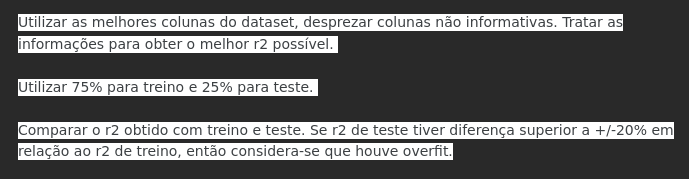

### Tratando os dados

In [18]:
dfteste = df

In [19]:
df_dummies = pd.get_dummies(dfteste['Genre'], prefix='Genre')

In [15]:
df_dummies = pd.get_dummies(df_dummies['Genre_Action, Adventure'], prefix='Genre')

In [23]:
lista = [df_dummies.columns]


In [24]:
lista

[Index(['Genre_Action, Adventure', 'Genre_Action, Adventure, Biography',
        'Genre_Action, Adventure, Comedy', 'Genre_Action, Adventure, Crime',
        'Genre_Action, Adventure, Drama', 'Genre_Action, Adventure, Family',
        'Genre_Action, Adventure, Fantasy', 'Genre_Action, Adventure, History',
        'Genre_Action, Adventure, Horror', 'Genre_Action, Adventure, Mystery',
        ...
        'Genre_Horror', 'Genre_Horror, Mystery, Sci-Fi',
        'Genre_Horror, Mystery, Thriller', 'Genre_Horror, Sci-Fi',
        'Genre_Horror, Thriller', 'Genre_Mystery, Romance, Thriller',
        'Genre_Mystery, Sci-Fi, Thriller', 'Genre_Mystery, Thriller',
        'Genre_Thriller', 'Genre_Western'],
       dtype='object', length=202)]

In [ ]:
df2 = df2.drop(columns=['Poster_Link', 'Series_Title', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'])

In [ ]:
df2

,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,A,142 min,9.3,80.0,2343110,"28,341,469"
1,1972,A,175 min,9.2,100.0,1620367,"134,966,411"
2,2008,UA,152 min,9.0,84.0,2303232,"534,858,444"
3,1974,A,202 min,9.0,90.0,1129952,"57,300,000"
4,1957,U,96 min,9.0,96.0,689845,"4,360,000"
...,...,...,...,...,...,...,...
995,1961,A,115 min,7.6,76.0,166544,NaN
996,1956,G,201 min,7.6,84.0,34075,NaN
997,1953,Passed,118 min,7.6,85.0,43374,"30,500,000"
998,1944,NaN,97 min,7.6,78.0,26471,NaN


In [ ]:
# Arrumando as colunas para númericas

df2['Runtime'] = df2['Runtime'].str.replace(' min', '').astype(int)
df2['Gross'] = df2['Gross'].str.replace('.', '', regex=False)  # Remove pontos
df2['Gross'] = df2['Gross'].str.replace(',', '.', regex=False)  # Converte vírgulas para pontos, se necessário
df2['Gross'] = df2['Gross'].astype(int)  # Converte para inteiro

# Transformando em númericos

df2['Runtime'] = pd.to_numeric(df2['Runtime'])
df2['Gross'] = pd.to_numeric(df2['Gross'])
df2['Released_Year'] = pd.to_numeric(df2['Released_Year'])
print(df2.dtypes)

Released_Year     object
Certificate       object
Runtime            int64
IMDB_Rating      float64
Meta_score       float64
No_of_Votes        int64
Gross             object
dtype: object


In [ ]:
df2

,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,A,142 min,9.3,80.0,2343110,28.341.469
1,1972,A,175 min,9.2,100.0,1620367,134.966.411
2,2008,UA,152 min,9.0,84.0,2303232,534.858.444
3,1974,A,202 min,9.0,90.0,1129952,57.300.000
4,1957,U,96 min,9.0,96.0,689845,4.360.000
...,...,...,...,...,...,...,...
995,1961,A,115 min,7.6,76.0,166544,NaN
996,1956,G,201 min,7.6,84.0,34075,NaN
997,1953,Passed,118 min,7.6,85.0,43374,30.500.000
998,1944,NaN,97 min,7.6,78.0,26471,NaN


In [ ]:
df2['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [ ]:
df_dummies = pd.get_dummies(df2['Certificate'], prefix='Certificate')

"""

pd.get_dummies(df['Category'], prefix='Category') cria uma nova DataFrame df_dummies com colunas binárias (0 ou 1) para cada valor único na coluna Category.
O prefixo 'Category' é adicionado aos nomes das novas colunas para diferenciá-las.

"""

"\n\npd.get_dummies(df['Category'], prefix='Category') cria uma nova DataFrame df_dummies com colunas binárias (0 ou 1) para cada valor único na coluna Category.\nO prefixo 'Category' é adicionado aos nomes das novas colunas para diferenciá-las.\n\n"

In [ ]:
df_dummies

,Certificate_16,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_dummies.columns

Index(['Certificate_16', 'Certificate_A', 'Certificate_Approved',
       'Certificate_G', 'Certificate_GP', 'Certificate_PG',
       'Certificate_PG-13', 'Certificate_Passed', 'Certificate_R',
       'Certificate_TV-14', 'Certificate_TV-MA', 'Certificate_TV-PG',
       'Certificate_U', 'Certificate_U/A', 'Certificate_UA',
       'Certificate_Unrated'],
      dtype='object')

In [ ]:
#df_dummies

#df1['drugs'] = df1.apply(lambda row: 1 if row['drugs']=='yes' else 0, axis=1)
#df_dummies = df_dummies.apply(lambda row: 1 if row['Certificate_16'] == 'True' else 0, axis=1)

colunas = ['Certificate_16', 'Certificate_A', 'Certificate_Approved',
       'Certificate_G', 'Certificate_GP', 'Certificate_PG',
       'Certificate_PG-13', 'Certificate_Passed', 'Certificate_R',
       'Certificate_TV-14', 'Certificate_TV-MA', 'Certificate_TV-PG',
       'Certificate_U', 'Certificate_U/A', 'Certificate_UA',
       'Certificate_Unrated']



#for column in colunas: # Analisa cada valor dentro da lista
#  df_dummies= df_dummies[column].apply(lambda value: 1 if value[column] == 'True' else 0)

for column in colunas:
    if column in df_dummies.columns:
        df_dummies[column] = df_dummies[column].apply(lambda value: 1 if value == True else 0)
    else:
        print(f'Deu errado')


In [ ]:
df_dummies


,Certificate_16,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3 = pd.concat([df2, df_dummies], axis=1)

In [ ]:
del df3['Certificate']

In [ ]:
df3

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Certificate_16,Certificate_A,Certificate_Approved,Certificate_G,...,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated
0,1994,142,9.3,80.0,2343110,28341469,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1972,175,9.2,100.0,1620367,134966411,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008,152,9.0,84.0,2303232,534858444,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1974,202,9.0,90.0,1129952,57300000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1957,96,9.0,96.0,689845,4360000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1961,115,7.6,76.0,166544,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
996,1956,201,7.6,84.0,34075,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
997,1953,118,7.6,85.0,43374,30500000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
998,1944,97,7.6,78.0,26471,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3.isna().sum()

,0
Released_Year,0
Runtime,0
IMDB_Rating,0
Meta_score,157
No_of_Votes,0
Gross,169
Certificate_16,0
Certificate_A,0
Certificate_Approved,0
Certificate_G,0


In [ ]:
# Terminando os tratamentos e dtypes

df3['Released_Year'].unique()
df_teste = df3[df3['Released_Year'] == 'PG'] # Filtrando linha
# A linha 966 possui um valor inesperado!

df3 = df3.drop(966)

df3['Released_Year'] = pd.to_numeric(df3['Released_Year'])

In [ ]:
df3['Released_Year'].unique()


array([1994, 1972, 2008, 1974, 1957, 2003, 1993, 2010, 1999, 2001, 1966,
       2002, 1990, 1980, 1975, 2020, 2019, 2014, 1998, 1997, 1995, 1991,
       1977, 1962, 1954, 1946, 2011, 2006, 2000, 1988, 1985, 1968, 1960,
       1942, 1936, 1931, 2018, 2017, 2016, 2012, 2009, 2007, 1984, 1981,
       1979, 1971, 1963, 1964, 1950, 1940, 2013, 2005, 2004, 1992, 1987,
       1986, 1983, 1976, 1973, 1965, 1959, 1958, 1952, 1948, 1944, 1941,
       1927, 1921, 2015, 1996, 1989, 1978, 1961, 1955, 1953, 1925, 1924,
       1982, 1967, 1951, 1949, 1939, 1937, 1934, 1928, 1926, 1920, 1970,
       1969, 1956, 1947, 1945, 1930, 1938, 1935, 1933, 1932, 1922, 1943])

In [ ]:
df3.dtypes

,0
Released_Year,int64
Runtime,int64
IMDB_Rating,float64
Meta_score,float64
No_of_Votes,int64
Gross,object
Certificate_16,int64
Certificate_A,int64
Certificate_Approved,int64
Certificate_G,int64


## Dataset com Valores NaN expulsos

### Separando dataset de treino e de teste

In [ ]:
df4 = df3

In [ ]:
df4 = df4.dropna()

# Removendo NaN

In [ ]:
df4

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Certificate_16,Certificate_A,Certificate_Approved,Certificate_G,...,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated
0,1994,142,9.3,80.0,2343110,28341469,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1972,175,9.2,100.0,1620367,134966411,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008,152,9.0,84.0,2303232,534858444,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1974,202,9.0,90.0,1129952,57300000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1957,96,9.0,96.0,689845,4360000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1971,157,7.6,77.0,30144,696690,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,1970,144,7.6,50.0,45338,1378435,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
992,1967,78,7.6,65.0,166409,141843612,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
994,1964,87,7.6,96.0,40351,13780024,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df4.isna().sum()


,0
Released_Year,0
Runtime,0
IMDB_Rating,0
Meta_score,0
No_of_Votes,0
Gross,0
Certificate_16,0
Certificate_A,0
Certificate_Approved,0
Certificate_G,0


In [ ]:

y = df4['IMDB_Rating']

x = df4[['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes',
         'Gross', 'Certificate_16', 'Certificate_A', 'Certificate_Approved',
         'Certificate_G', 'Certificate_GP', 'Certificate_PG',
         'Certificate_PG-13', 'Certificate_Passed', 'Certificate_R',
         'Certificate_TV-14', 'Certificate_TV-MA', 'Certificate_TV-PG',
         'Certificate_U', 'Certificate_U/A', 'Certificate_UA',
         'Certificate_Unrated']]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

print(f'Score (R²) dos dataset de treinamento {model.score(X_train, Y_train)}')
print(f'Score (R²) dos dataset de teste {model.score(X_test, Y_test)}')

Score (R²) dos dataset de treinamento 0.5917613123198107
Score (R²) dos dataset de teste 0.5809697284632442


In [ ]:
score_train = 0.5917613123198107
score_test = 0.5809697284632442

# Calculo

score_test * 100 / score_train

## Dataset com Valores NaN como 0

In [ ]:
df5 = df3

df5

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Certificate_16,Certificate_A,Certificate_Approved,Certificate_G,...,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated
0,1994,142,9.3,80.0,2343110,28341469,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1972,175,9.2,100.0,1620367,134966411,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008,152,9.0,84.0,2303232,534858444,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1974,202,9.0,90.0,1129952,57300000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1957,96,9.0,96.0,689845,4360000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1961,115,7.6,76.0,166544,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
996,1956,201,7.6,84.0,34075,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
997,1953,118,7.6,85.0,43374,30500000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
998,1944,97,7.6,78.0,26471,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df5 = df5.fillna(0)

### Separando dataset de treino e teste

In [ ]:
y = df5['IMDB_Rating']

x = df5[['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes',
         'Gross', 'Certificate_16', 'Certificate_A', 'Certificate_Approved',
         'Certificate_G', 'Certificate_GP', 'Certificate_PG',
         'Certificate_PG-13', 'Certificate_Passed', 'Certificate_R',
         'Certificate_TV-14', 'Certificate_TV-MA', 'Certificate_TV-PG',
         'Certificate_U', 'Certificate_U/A', 'Certificate_UA',
         'Certificate_Unrated']]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=11)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

print(f'Score (R²) dos dataset de treinamento {model.score(X_train, Y_train)}')
print(f'Score (R²) dos dataset de teste {model.score(X_test, Y_test)}')

Score (R²) dos dataset de treinamento 0.460146410542294
Score (R²) dos dataset de teste 0.43943972389901376


In [ ]:
score_train = 0.460146410542294
score_test = 0.43943972389901376

# Calculo

score_test * 100 / score_train



## Conclusões

**Dataset sem valores NaN**

O uso desse dataset para o modelo se mostrou eficaz com 1.83% de diferença de score R² entre o Score de Treinamento (com aproximadamente 0.5917) e o Score de Teste (com aproximadamente 0.5809). Em geral o modelo apresentou bom resultados e um R² interessante.

**Dataset com valores NaN**

O uso desse dataset para o modelo se mostrou menos eficaz em relação ao que retirava os valores nulos, tendo um diferença de 4.51% entre os scores de teste e de treino. Em geral o modelo se mostrou menos eficaz que o outro, mas o resultado não é desagradavel.

**Conclusão final**

O dataset sem valores NaN se mostrou superior e deve ser priorizado quando se trata da previsão dos dados deste dataset ou de parecidos, ja que há uma diferença grande entre os scores de 0.131614902 (conta considerando apenas os scores de treinamento). Ou seja, neste caso o modelo com valores NaN sendo transformados em 0 deve ser descontinuado.